<a href="https://colab.research.google.com/github/SELOMELO280104/Roboflow_test/blob/main/polygon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Polygon Test

In [2]:
# Gerekli kütüphaneleri kur
!pip install ultralytics -q
import os
import zipfile
from google.colab import files
from ultralytics import YOLO

# 1. Zip dosyasını yükleme ekranı
print("👇 Lütfen Roboflow'dan indirdiğiniz '.zip' uzantılı veri setini seçin:")
uploaded = files.upload()

if uploaded:
    zip_filename = list(uploaded.keys())[0]
    extract_dir = '/content/dataset_bbox'

    # 2. Zip dosyasını çıkartma
    print(f"\n📦 '{zip_filename}' çıkartılıyor...")
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

    # 3. data.yaml dosyasını otomatik bulma
    yaml_path = None
    for root, dirs, dosyalar in os.walk(extract_dir):
        if 'data.yaml' in dosyalar:
            yaml_path = os.path.join(root, 'data.yaml')
            break

    if yaml_path:
        print(f"✅ Veri seti hazır! Dosya yolu: {yaml_path}")

        # 4. Eğitimi Başlatma (Bounding Box için yolov8n.pt)
        print("\n🚀 Bounding Box (Kutu) eğitimi T4 GPU üzerinde başlıyor...")
        model = YOLO('yolov8n.pt')

        results = model.train(
            data=yaml_path,
            epochs=30,
            imgsz=640,
            batch=16,
            project='/content/Trained_model',
            name='ayakkabi_bbox_sonuc'
        )
        print("\n🎉 Eğitim başarıyla tamamlandı!")
    else:
        print("❌ HATA: Zip dosyasının içinde 'data.yaml' bulunamadı!")
else:
    print("❌ Dosya yüklemesi iptal edildi.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
👇 Lütfen Roboflow'dan indirdiğiniz '.zip' uzantılı veri setini seçin:


Saving My First Project.v1i.yolov8.zip to My First Project.v1i.yolov8.zip

📦 'My First Project.v1i.yolov8.zip' çıkartılıyor...
✅ Veri seti hazır! Dosya yolu: /content/dataset_bbox/data.yaml

🚀 Bounding Box (Kutu) eğitimi T4 GPU üzerinde başlıyor...
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_bbox/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, l

🔍 Test verileriyle performans ölçülüyor...
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 826.1±326.9 MB/s, size: 19.6 KB)
val: Scanning /content/dataset_bbox/test/labels... 4 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4/4 1.6Kit/s 0.0s
val: New cache created: /content/dataset_bbox/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 4.8it/s 0.2s
                   all          4          4      0.981          1      0.995      0.995
Speed: 1.9ms preprocess, 35.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/Trained_model/test_sonuclari

📷 Test Klasöründen Örnek Tespit:


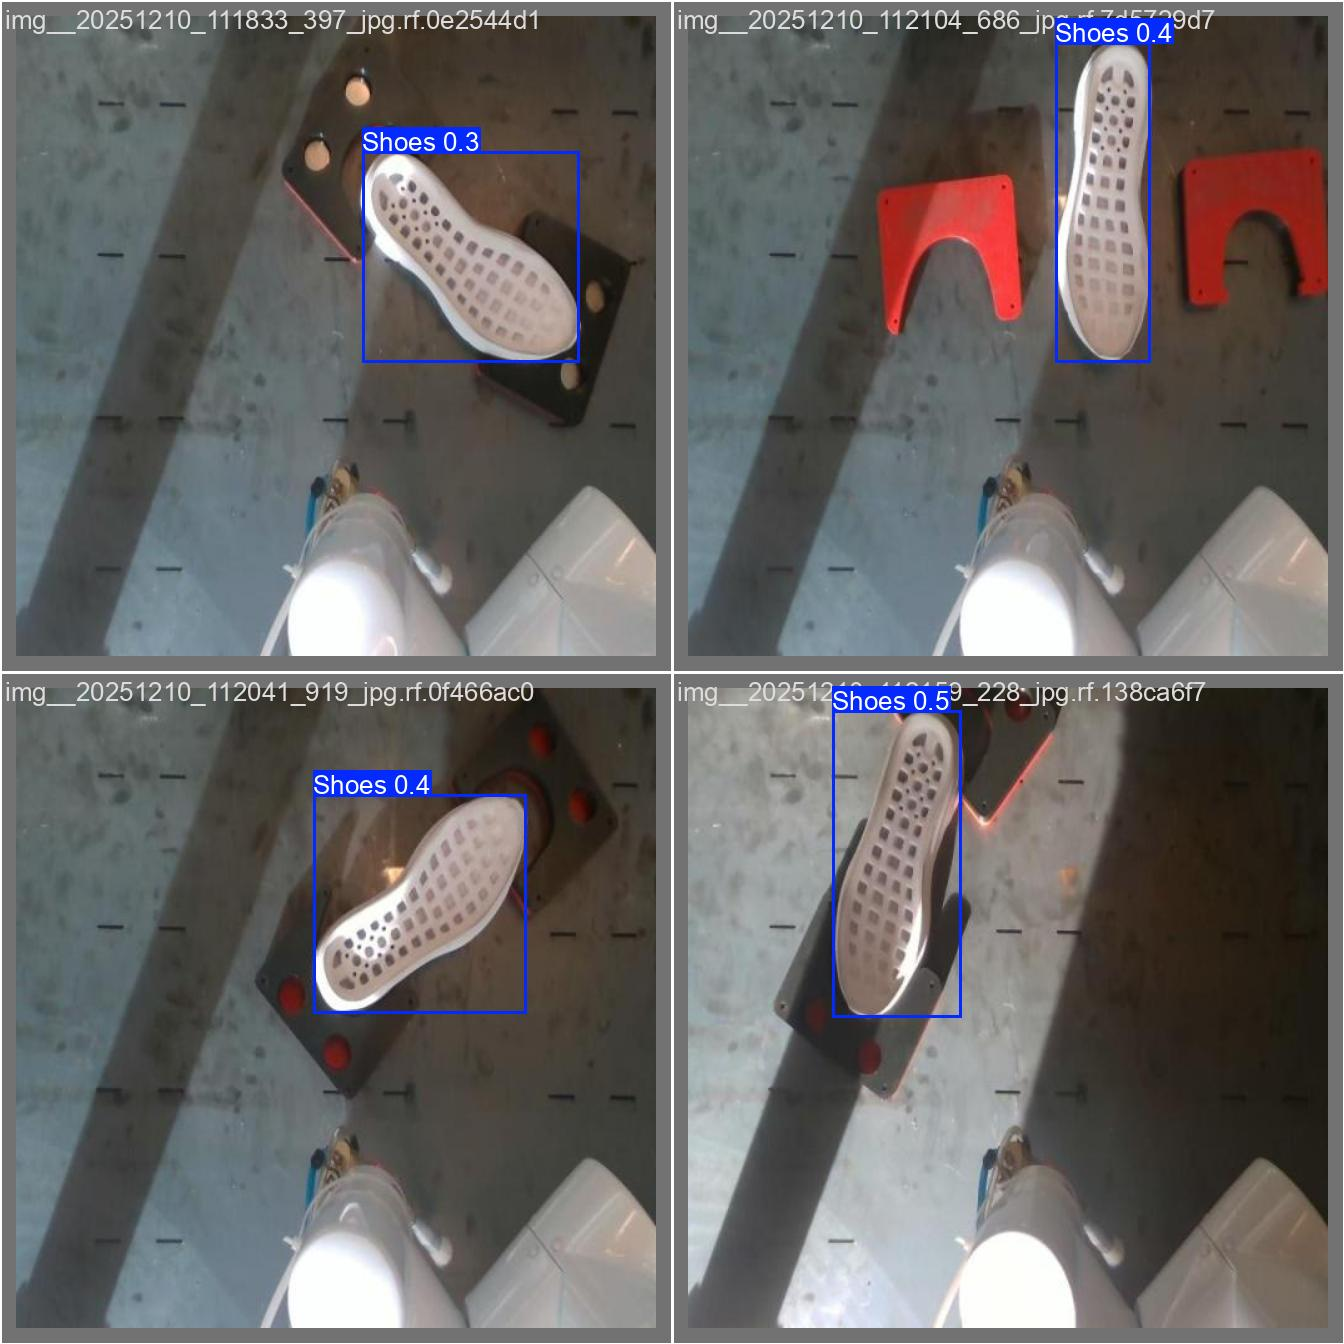

In [4]:
from IPython.display import Image, display
import glob
from ultralytics import YOLO

print("🔍 Test verileriyle performans ölçülüyor...")

# Eğitilmiş en iyi modeli yükle
best_model_path = '/content/Trained_model/ayakkabi_bbox_sonuc/weights/best.pt'
model = YOLO(best_model_path)

# Sadece 'test' klasöründeki resimleri kullanarak doğrulama yap
metrics = model.val(split='test', project='/content/Trained_model', name='test_sonuclari')

# Test sonuçlarından örnek bir görseli ekrana bas
print("\n📷 Test Klasöründen Örnek Tespit:")
resimler = glob.glob('/content/Trained_model/test_sonuclari*/val_batch0_pred.jpg')

if resimler:
    display(Image(filename=resimler[0]))
else:
    print("Örnek görsel bulunamadı.")

In [ ]:
from google.colab import files

best_model_path = '/content/Trained_model/ayakkabi_bbox_sonuc/weights/best.pt'
print("⬇️ Eğitilmiş model (best.pt) bilgisayarınıza indiriliyor...")

try:
    files.download(best_model_path)
    print("✅ İndirme işlemi başlatıldı!")
except Exception as e:
    print(f"❌ İndirme sırasında bir hata oluştu: {e}")